## This notebook examines run and stop epochs using linear mixed effects modelling 

In [2]:
# Loading data
data_path = '/Users/lauraberkowitz/Google Drive/Manuscripts/In Progress/TgF344-AD_OF/Data/'
df = read.csv('/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/data/movement_metrics_mixed models.csv')
df = df[df['day'] == 'D1',]
df

,subID,group,day,circuity,duration,length,cue_bearing,run_peak_vel,run_cue_proximity
1,Tg102_D1,tg,D1,0.22876971,32.666667,342.12598,-152.575323,8.556018,103.539542
2,Tg102_D1,tg,D1,0.28562012,12.700000,159.24284,111.208081,10.246973,111.368398
3,Tg102_D1,tg,D1,0.45256905,8.100000,71.82797,-89.075537,6.609331,75.850427
4,Tg102_D1,tg,D1,0.51386720,5.900000,54.67640,-45.953744,5.126163,78.733627
5,Tg102_D1,tg,D1,0.57371227,14.066667,136.20894,-12.613017,9.260720,168.748826
6,Tg102_D1,tg,D1,0.63158981,15.266667,164.31540,-153.612119,6.221750,150.953187
7,Tg102_D1,tg,D1,0.09699822,36.800000,355.31475,-17.746951,7.853803,101.084913
8,Tg102_D1,tg,D1,0.49625934,6.033333,32.64298,-87.295254,2.338701,104.431547
14,Tg103_D1,tg,D1,0.05009387,49.866667,362.41945,-6.624515,8.623568,7.586034
15,Tg103_D1,tg,D1,0.04942530,14.033333,74.19709,-71.234274,3.850131,11.457637


## Fit model for Circuity

In [3]:
library(lme4)
library(lmerTest)

# full model
mld_f = lmer(circuity ~ group + (1|subID), data=df)
summary(mld_f)

# reduced model
mld_r = lmer(circuity ~ 1 + (1|subID), data=df)
summary(mld_r)

Loading required package: Matrix
Warning message:
“package ‘lmerTest’ was built under R version 3.6.3”

ERROR: Error: package or namespace load failed for ‘lmerTest’ in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 there is no package called ‘ggplot2’


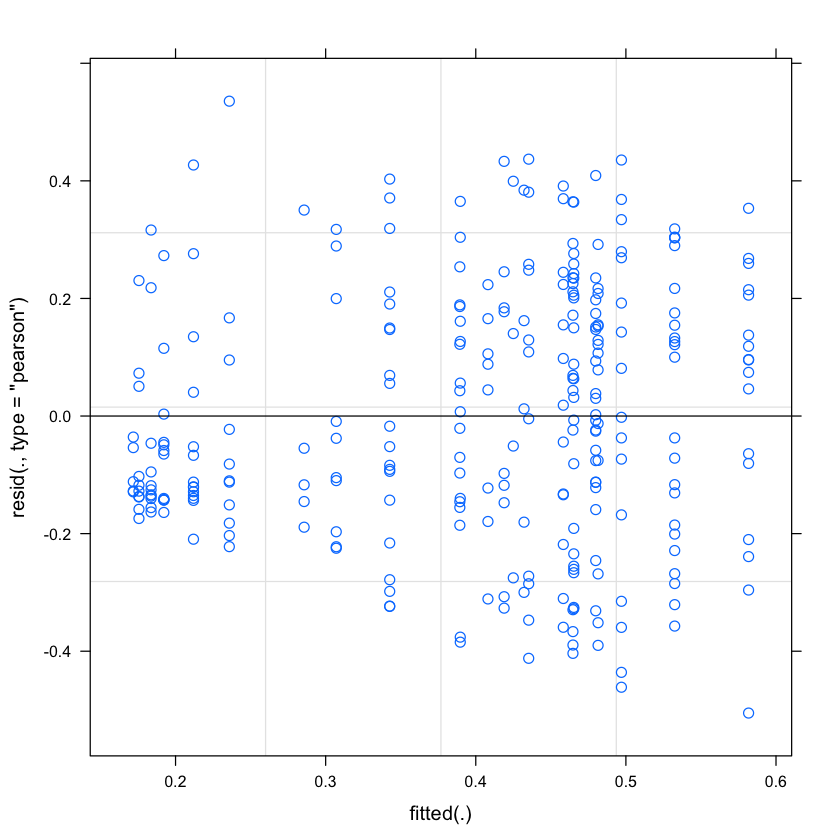

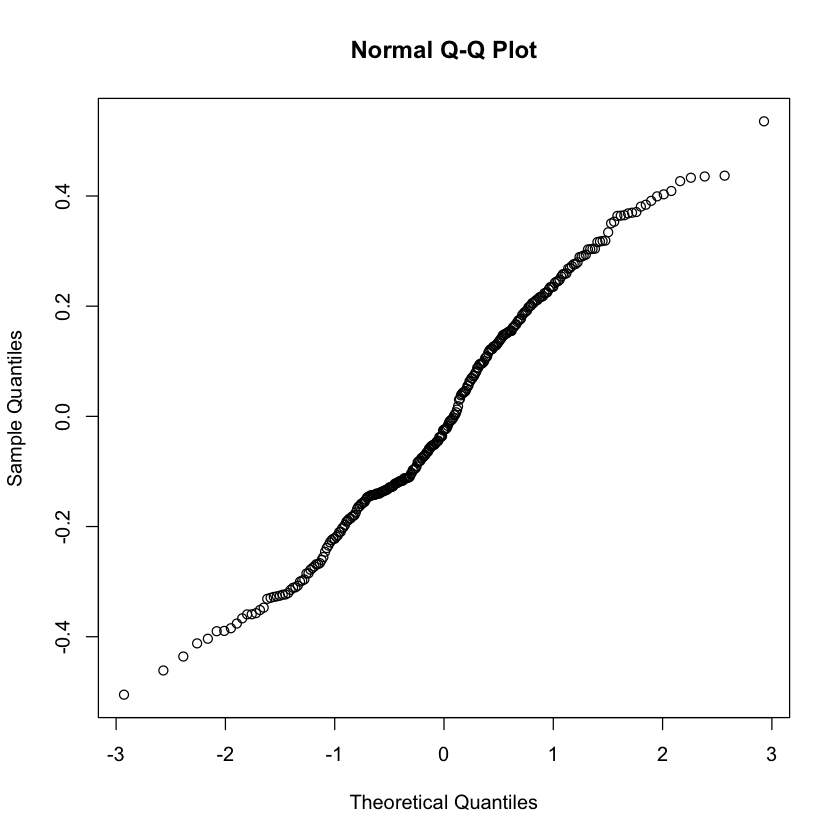

In [5]:
# Check model residuals
plot(mld_f)
## QQ plot
qqnorm(residuals(mld_f))

## Fit model for Duration

In [10]:
library(lme4)
library(lmerTest)

# full model
mld_f = lmer(log10(duration) ~ group + (1|subID), data=df)
summary(mld_f)

# reduced model
mld_r = lmer(log10(duration) ~ 1 + (1|subID), data=df)
summary(mld_r)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log10(duration) ~ group + (1 | subID)
   Data: df

REML criterion at convergence: 218.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8268 -0.7428 -0.1026  0.6473  3.6084 

Random effects:
 Groups   Name        Variance Std.Dev.
 subID    (Intercept) 0.004825 0.06946 
 Residual             0.116423 0.34121 
Number of obs: 293, groups:  subID, 24

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  1.02885    0.03383 15.48479   30.41 3.13e-15 ***
groupwt      0.05361    0.05012 18.32505    1.07    0.299    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
        (Intr)
groupwt -0.675

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log10(duration) ~ 1 + (1 | subID)
   Data: df

REML criterion at convergence: 215.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8715 -0.7282 -0.0766  0.6358  3.5597 

Random effects:
 Groups   Name        Variance Std.Dev.
 subID    (Intercept) 0.004661 0.06827 
 Residual             0.116585 0.34145 
Number of obs: 293, groups:  subID, 24

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  1.05300    0.02482 18.63451   42.42   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

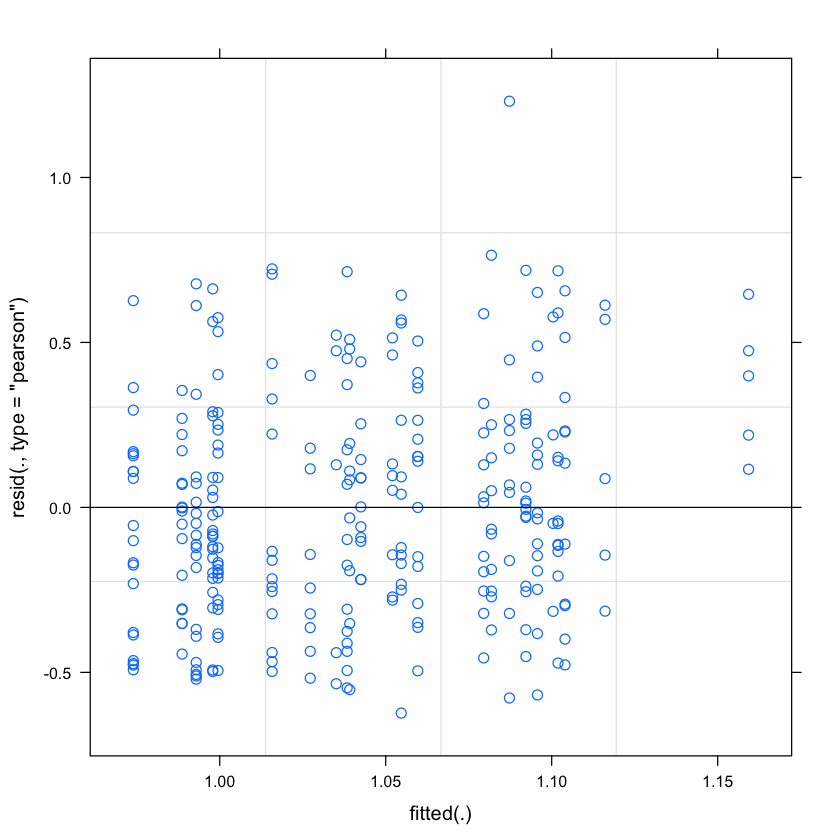

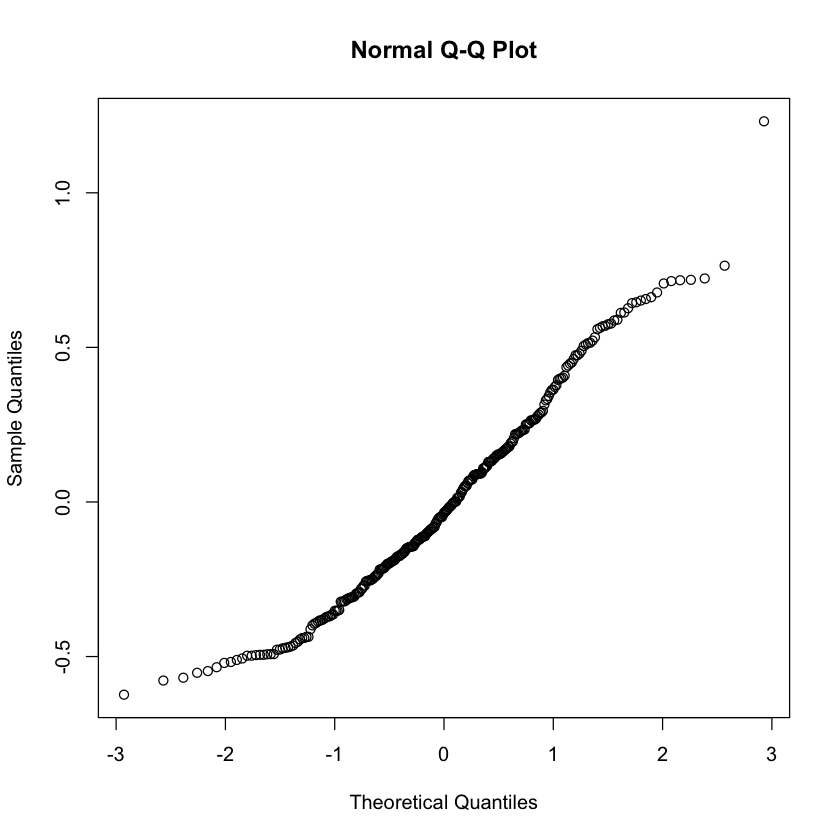

In [11]:
# Check model residuals
plot(mld_f)
## QQ plot
qqnorm(residuals(mld_f))

## Fit model for Length 

In [32]:
library(lme4)
library(lmerTest)

# full model
mld_f = lmer(length^-1/4 ~ group + (1|subID), data=df)
summary(mld_f)

# reduced model
mld_r = lmer(length^-1/4 ~ 1 + (1|subID), data=df)
summary(mld_r)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: length^-1/4 ~ group + (1 | subID)
   Data: df

REML criterion at convergence: -2526.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6218 -0.7178 -0.1781  0.4282  4.3800 

Random effects:
 Groups   Name        Variance  Std.Dev.
 subID    (Intercept) 1.108e-06 0.001053
 Residual             8.980e-06 0.002997
Number of obs: 293, groups:  subID, 24

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)  3.923e-03  3.902e-04  2.171e+01  10.052 1.26e-09 ***
groupwt     -8.117e-05  5.683e-04  2.404e+01  -0.143    0.888    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
        (Intr)
groupwt -0.687

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: length^-1/4 ~ 1 + (1 | subID)
   Data: df

REML criterion at convergence: -2539.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6161 -0.7188 -0.1743  0.4341  4.3950 

Random effects:
 Groups   Name        Variance  Std.Dev.
 subID    (Intercept) 1.030e-06 0.001015
 Residual             8.978e-06 0.002996
Number of obs: 293, groups:  subID, 24

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 3.887e-03  2.776e-04 2.496e+01      14 2.51e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

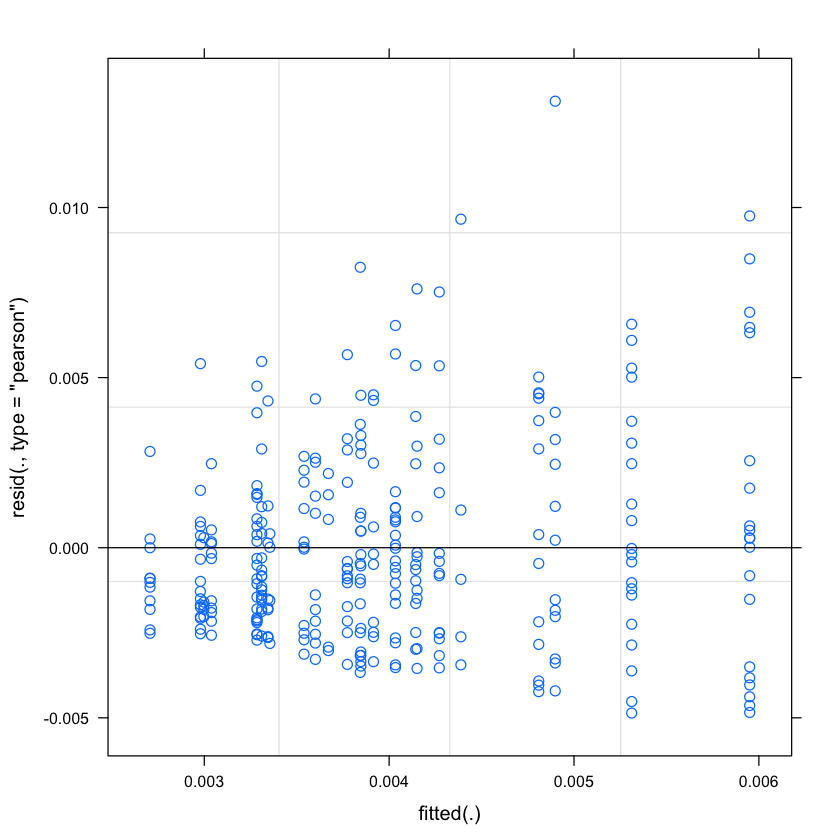

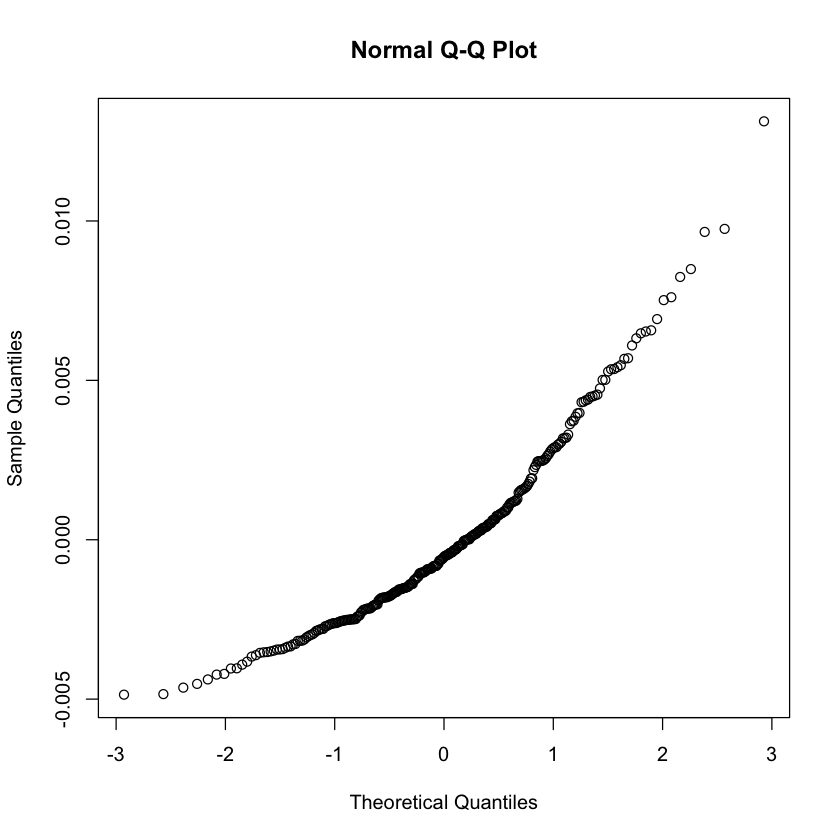

In [33]:
# Check model residuals
plot(mld_f)
## QQ plot
qqnorm(residuals(mld_f))

## Fit model for Peak Velocity of Run

In [122]:
library(lme4)
library(lmerTest)

# full model
mld_f = lmer(run_peak_vel ~ group + (1|subID), data=df)
summary(mld_f)

# reduced model
mld_r = lmer(run_peak_vel   ~ 1 + (1|subID), data=df)
summary(mld_r)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: run_peak_vel ~ group + (1 | subID)
   Data: df

REML criterion at convergence: 1376.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.1778 -0.7929 -0.3432  0.5881  3.5865 

Random effects:
 Groups   Name        Variance Std.Dev.
 subID    (Intercept) 0.2094   0.4576  
 Residual             6.2629   2.5026  
Number of obs: 293, groups:  subID, 24

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   4.5698     0.2389  9.4873  19.129 6.75e-09 ***
groupwt       0.2264     0.3551 11.4165   0.638    0.536    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
        (Intr)
groupwt -0.673

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: run_peak_vel ~ 1 + (1 | subID)
   Data: df

REML criterion at convergence: 1377.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.1048 -0.8024 -0.3502  0.6157  3.6591 

Random effects:
 Groups   Name        Variance Std.Dev.
 subID    (Intercept) 0.1441   0.3796  
 Residual             6.2946   2.5089  
Number of obs: 293, groups:  subID, 24

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   4.6553     0.1683 10.9666   27.65 1.71e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

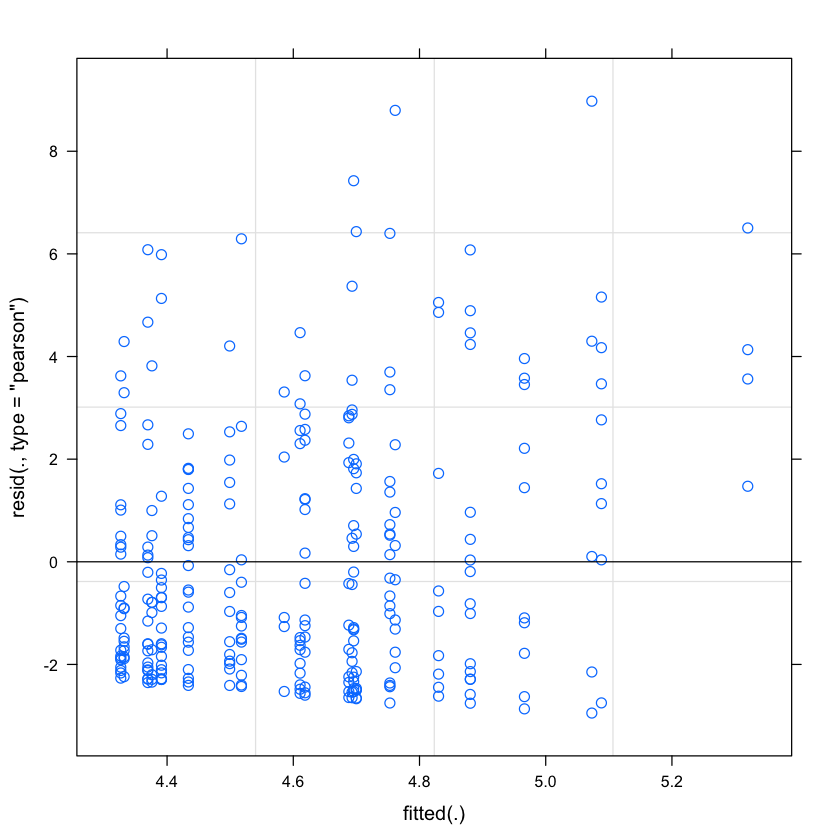

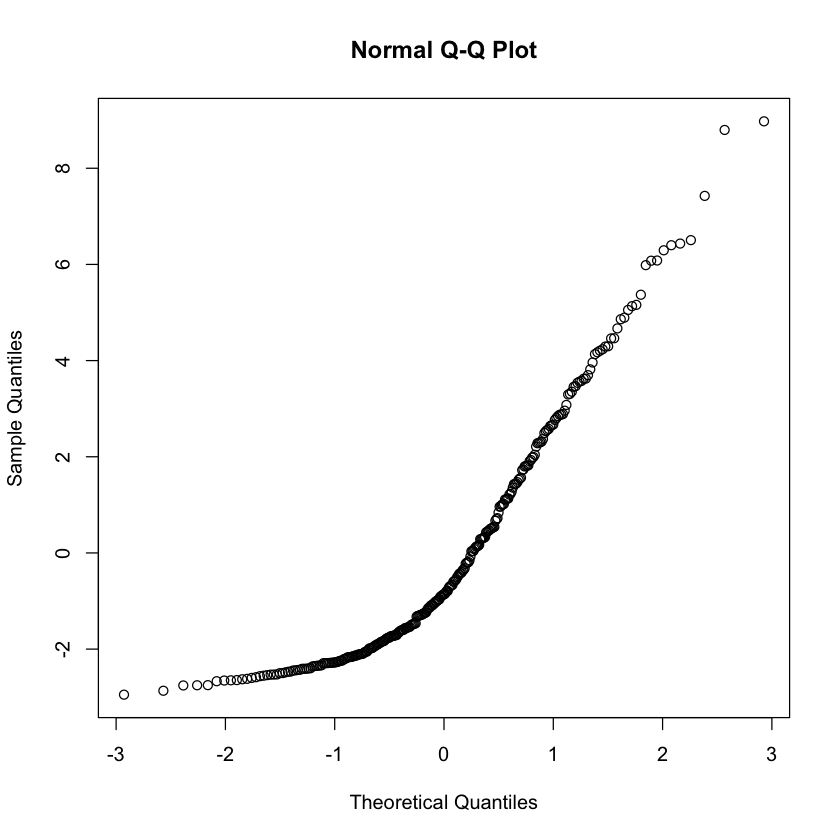

In [123]:
# Check model residuals
plot(mld_f)
## QQ plot
qqnorm(residuals(mld_f))


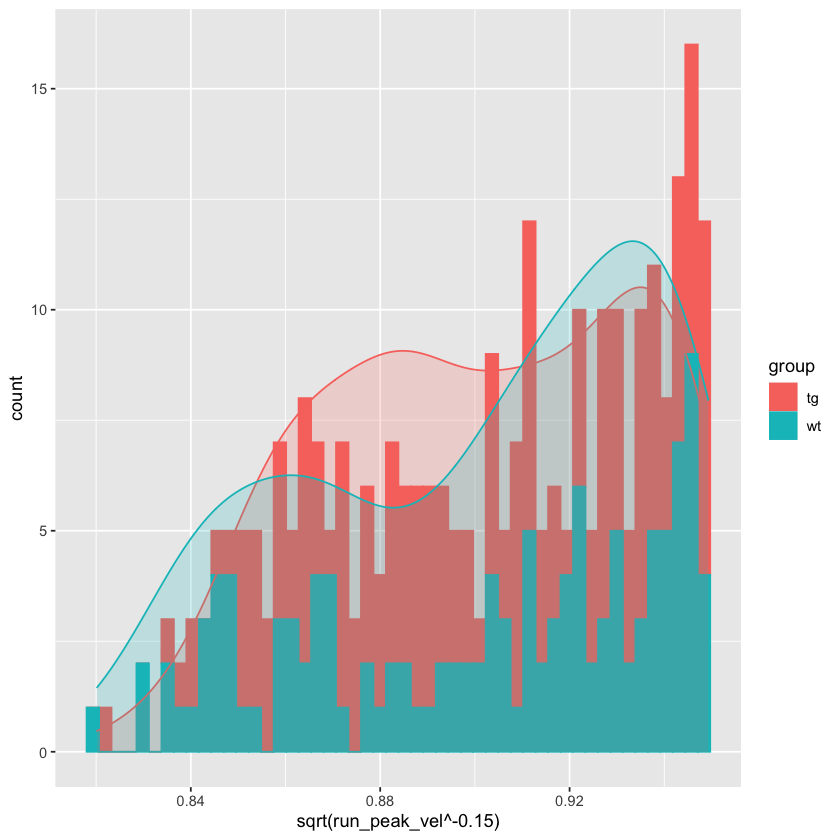

In [121]:
# Histogram with density plot
library(ggplot2)

ggplot(df, aes(x = sqrt(run_peak_vel^-.15),color = group,fill = group)) + 
 geom_histogram(bins = 50)+
 geom_density(alpha=.2)  

## Fit model for run proximity to cue

In [60]:
library(lme4)
library(lmerTest)

# full model
mld_f = lmer(run_cue_proximity ~ group + (1|subID), data=df)
summary(mld_f)

# reduced model
mld_r = lmer(run_cue_proximity  ~ 1 + (1|subID), data=df)
summary(mld_r)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: run_cue_proximity ~ group + (1 | subID)
   Data: df

REML criterion at convergence: 3040.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3278 -0.4725 -0.0839  0.4420  2.9739 

Random effects:
 Groups   Name        Variance Std.Dev.
 subID    (Intercept) 3595     59.96   
 Residual             1523     39.02   
Number of obs: 293, groups:  subID, 24

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)    
(Intercept)    92.83      17.62  21.42   5.268    3e-05 ***
groupwt       -21.10      25.00  21.67  -0.844    0.408    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
        (Intr)
groupwt -0.705

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: run_cue_proximity ~ 1 + (1 | subID)
   Data: df

REML criterion at convergence: 3049.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3205 -0.4823 -0.0892  0.4481  2.9792 

Random effects:
 Groups   Name        Variance Std.Dev.
 subID    (Intercept) 3553     59.60   
 Residual             1523     39.02   
Number of obs: 293, groups:  subID, 24

Fixed effects:
            Estimate Std. Error    df t value Pr(>|t|)    
(Intercept)    82.34      12.43 22.71   6.626 9.86e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

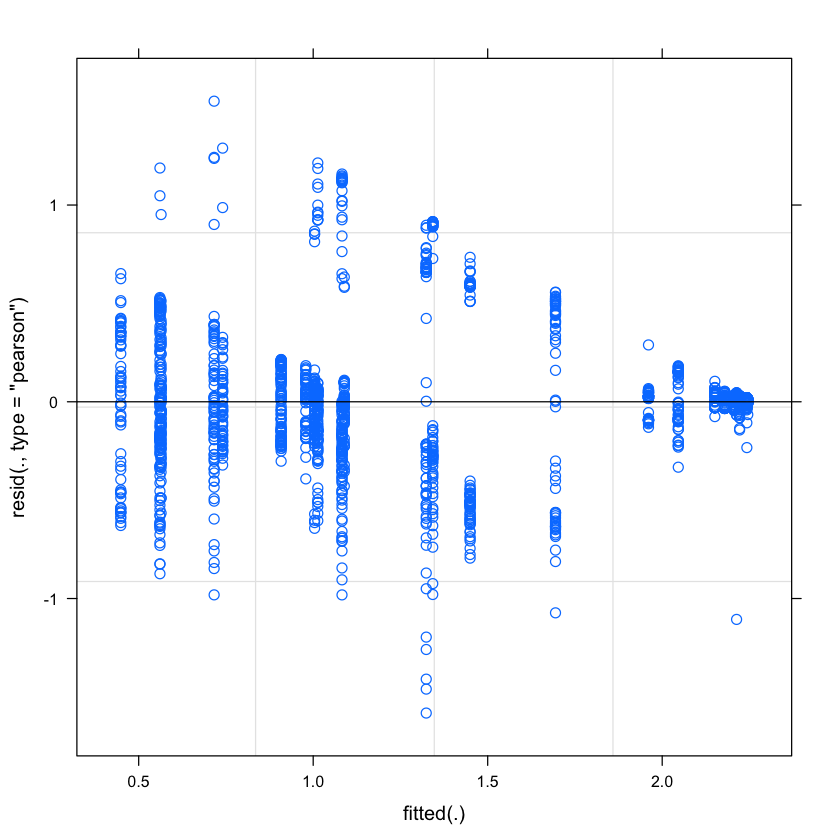

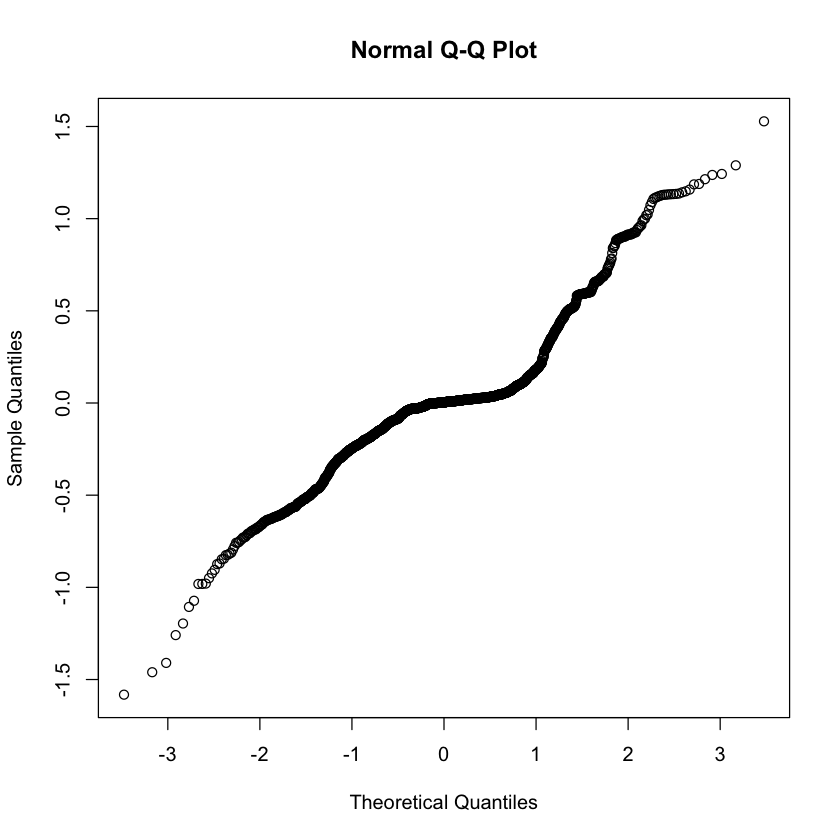

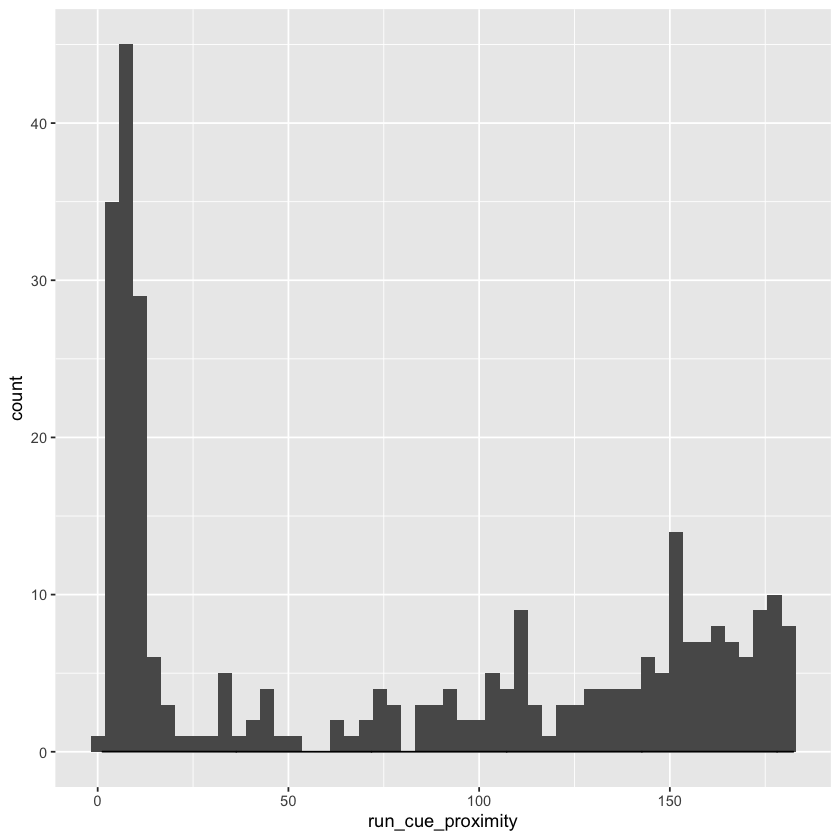

In [80]:
# Check model residuals
plot(mld_f)
## QQ plot
qqnorm(residuals(mld_f))


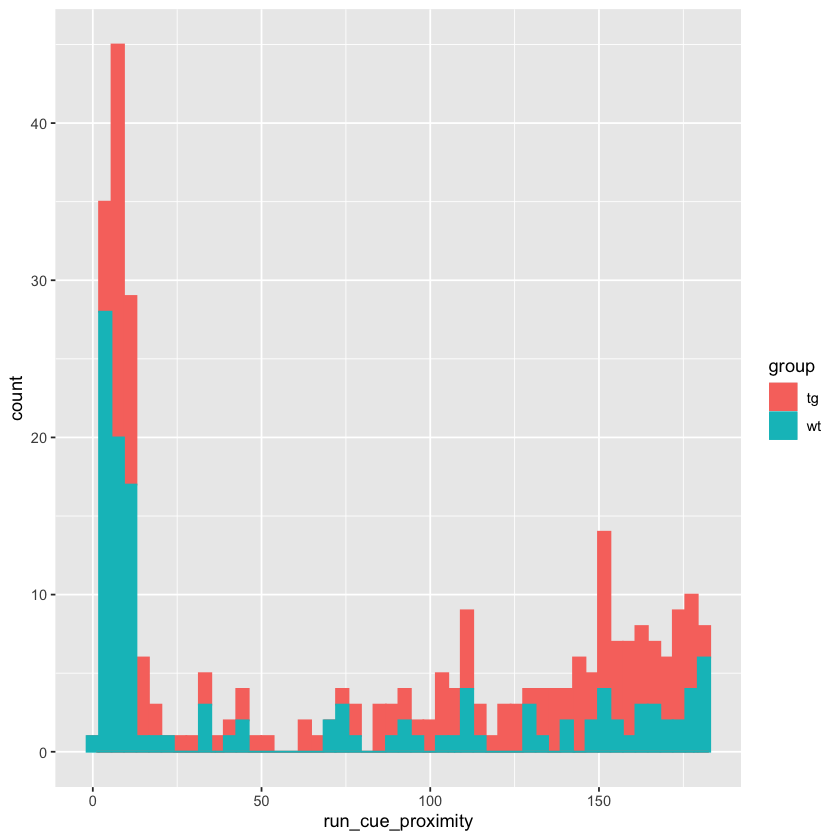

In [89]:
# Histogram with density plot
library(ggplot2)

ggplot(df, aes(x = run_cue_proximity,color = group,fill = group)) + 
 geom_histogram(bins = 50)+
 geom_density(alpha=.2)  


# Load stop data

In [124]:
# Loading data
data_path = '/Users/lauraberkowitz/Google Drive/Manuscripts/In Progress/TgF344-AD_OF/Data/'
df = read.csv('/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/data/stop_metrics_mixed_models.csv')
df = df[df['day'] == 'D1',]
df

,subID,group,day,stop_time,stop_cue_proximity
1,Tg102_D1,tg,D1,3.266667,105.05769
2,Tg102_D1,tg,D1,4.366667,80.45667
3,Tg102_D1,tg,D1,2.800000,73.78976
4,Tg102_D1,tg,D1,9.266667,74.08087
5,Tg102_D1,tg,D1,3.733333,74.21629
6,Tg102_D1,tg,D1,1.000000,74.24791
7,Tg102_D1,tg,D1,23.866667,73.00649
8,Tg102_D1,tg,D1,9.466667,73.20801
9,Tg102_D1,tg,D1,63.233333,73.60975
10,Tg102_D1,tg,D1,17.666667,73.99389


In [125]:
library(lme4)
library(lmerTest)

# full model
mld_f = lmer(log10(stop_time) ~ group + (1|subID), data=df)
summary(mld_f)

# reduced model
mld_r = lmer(log10(stop_time)  ~ 1 + (1|subID), data=df)
summary(mld_r)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log10(stop_time) ~ group + (1 | subID)
   Data: df

REML criterion at convergence: 2762.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8103 -0.7881 -0.1203  0.6271  3.4242 

Random effects:
 Groups   Name        Variance Std.Dev.
 subID    (Intercept) 0.00217  0.04658 
 Residual             0.23599  0.48579 
Number of obs: 1965, groups:  subID, 24

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)  0.845156   0.020895 19.616057  40.447   <2e-16 ***
groupwt     -0.006807   0.029196 18.692520  -0.233    0.818    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
        (Intr)
groupwt -0.716

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log10(stop_time) ~ 1 + (1 | subID)
   Data: df

REML criterion at convergence: 2757.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8012 -0.7886 -0.1184  0.6328  3.4239 

Random effects:
 Groups   Name        Variance Std.Dev.
 subID    (Intercept) 0.001922 0.04385 
 Residual             0.236011 0.48581 
Number of obs: 1965, groups:  subID, 24

Fixed effects:
            Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)  0.84153    0.01423 19.30253   59.14   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

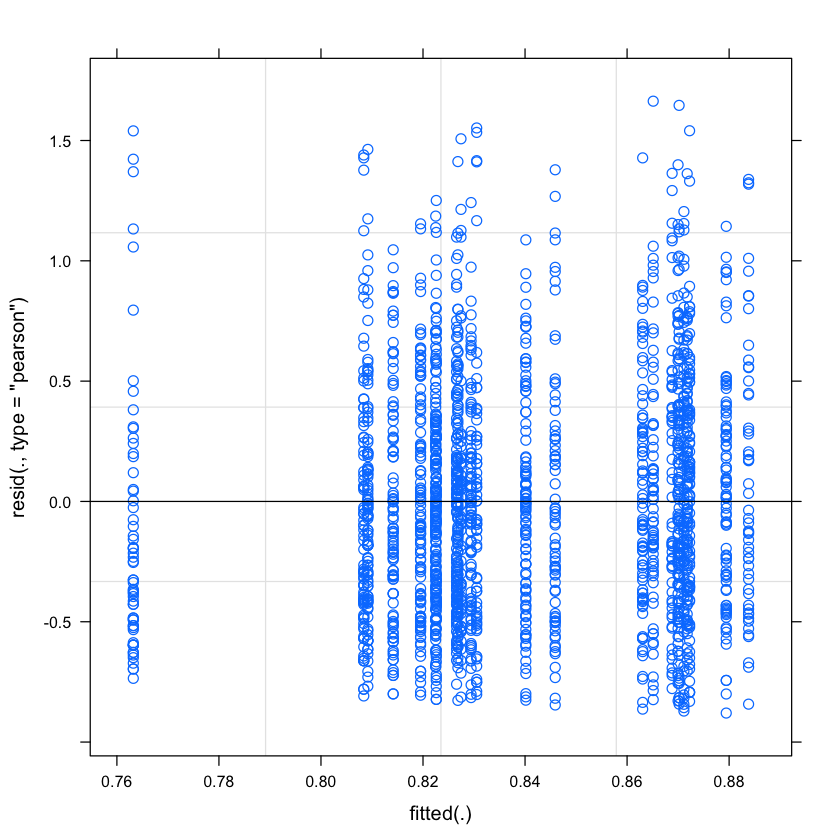

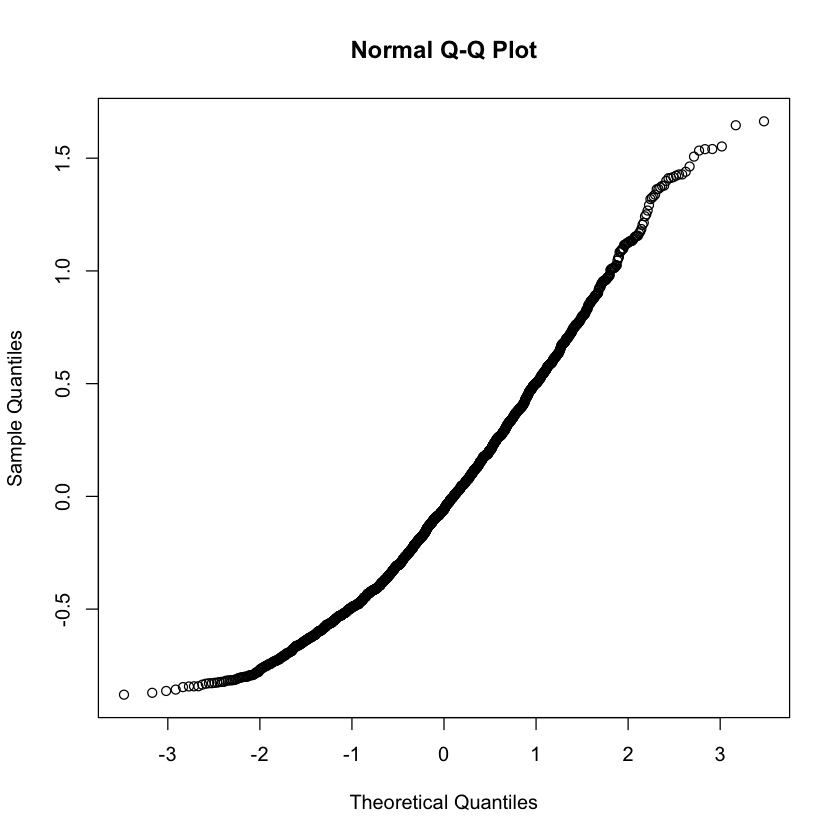

In [65]:
# Check model residuals
plot(mld_f)
## QQ plot
qqnorm(residuals(mld_f))

In [92]:
library(lme4)
library(lmerTest)

# full model
mld_f = lmer(log10(stop_cue_proximity) ~ group + (1|subID), data=df)
summary(mld_f)

# reduced model
mld_r = lmer(log10(stop_cue_proximity)  ~ 1 + (1|subID), data=df)
summary(mld_r)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log10(stop_cue_proximity) ~ group + (1 | subID)
   Data: df

REML criterion at convergence: 1507.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6115 -0.4127  0.0090  0.1598  4.4534 

Random effects:
 Groups   Name        Variance Std.Dev.
 subID    (Intercept) 0.3961   0.6293  
 Residual             0.1177   0.3431  
Number of obs: 1965, groups:  subID, 24

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   1.6195     0.1820 22.0168   8.897 9.62e-09 ***
groupwt      -0.3738     0.2574 22.0098  -1.452    0.161    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
        (Intr)
groupwt -0.707

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: log10(stop_cue_proximity) ~ 1 + (1 | subID)
   Data: df

REML criterion at convergence: 1508.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6092 -0.4151  0.0095  0.1599  4.4517 

Random effects:
 Groups   Name        Variance Std.Dev.
 subID    (Intercept) 0.4151   0.6443  
 Residual             0.1177   0.3431  
Number of obs: 1965, groups:  subID, 24

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   1.4326     0.1318 22.9999   10.87 1.54e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

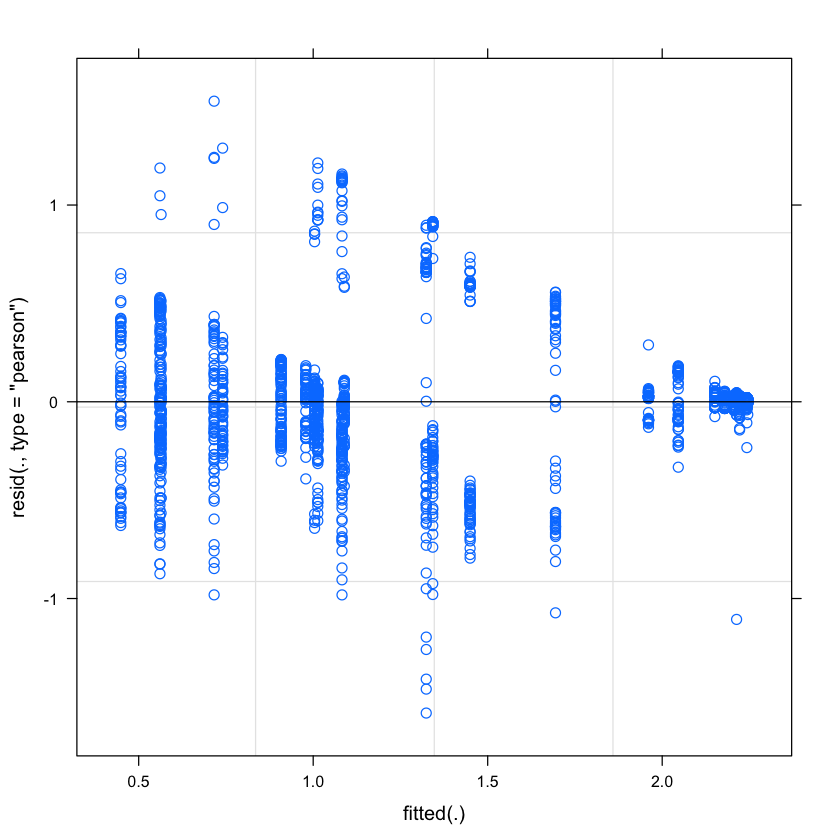

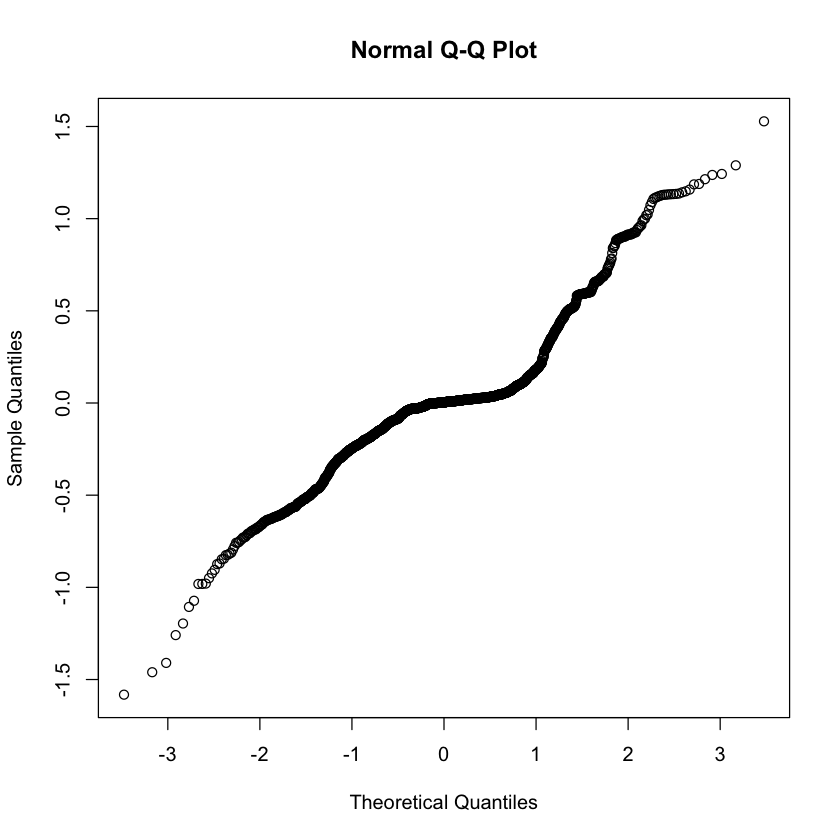

In [93]:
# Check model residuals
plot(mld_f)
## QQ plot
qqnorm(residuals(mld_f))

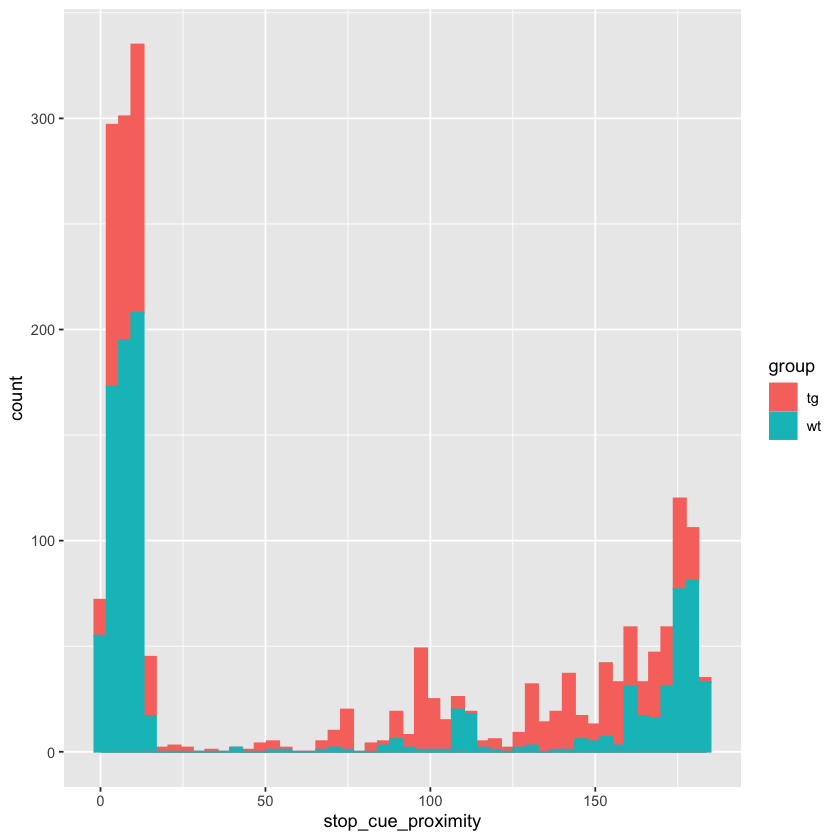

In [94]:
# Histogram with density plot
library(ggplot2)

ggplot(df, aes(x = stop_cue_proximity,color = group,fill = group)) + 
 geom_histogram(bins = 50)+
 geom_density(alpha=.2)  


In [1]:
install.packages('IRkernel')


NameError: name 'install' is not defined